In [2]:
#Imports
import library
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

In [17]:
#Data import and columns setting
data = library.loadList('exoplanet.csv')
col = {'mass':2,'radius':3}

In [5]:
#Function for finding non-existent density parameter from existent mass and radius
def getDensity(mass,radius):
    mass = float(mass)
    radius = float(radius)
    mass *= 1.898*(10**30)
    radius *= 6_991_100_000
    density = mass / (4/3*(pi*radius**3))
    cleanDensity = round(density,2)
    return cleanDensity

In [19]:
#Setting constant
earthMass = 0.003
#Lists
masterList = []
massList = []
densityList = []
#Data processing for densityList, massList, masterList of the 2
for n in range(len(data)):
    mass = data[n][col['mass']]
    radius = data[n][col['radius']]
    if mass != '' and radius != '':
        mass = float(mass)
        radius = float(radius)
        density = getDensity(mass, radius)
        densityList.append(density) #Density list
        mass /= earthMass #Mass is in earth masses
        masterList += [[round(mass,2), density]]
    if mass != '' and float(mass) <= 1.2:
        mass = float(mass)
        mass /= earthMass
        massList.append(round(mass,2)) #Mass list

#Printing the master list for both density and mass
print('[MASS(Earth.) , DENSITY(g/cm^3)]')
masterList.sort()
print(masterList)

[MASS(Earth.) , DENSITY(g/cm^3)]
[[0.0, 2.32], [0.06, 5.42], [0.07, 2.56], [0.11, 3.93], [0.29, 5.37], [0.47, 5.9], [0.47, 11.79], [0.67, 1.98], [0.7, 5.87], [0.84, 0.13], [0.85, 5.24], [1.05, 5.51], [1.28, 5.04], [1.36, 4.97], [1.57, 5.73], [1.7, 5.72], [1.78, 0.38], [1.84, 0.14], [1.96, 5.96], [1.99, 1.8], [2.07, 6.33], [2.1, 0.72], [2.2, 0.03], [2.59, 3.65], [2.84, 24.32], [3.01, 0.67], [3.49, 5.78], [3.68, 5.97], [3.72, 2.48], [3.82, 0.92], [3.98, 12.75], [4.0, 1.27], [4.0, 5.41], [4.19, 0.9], [4.2, 0.03], [4.2, 7.28], [4.28, 2.9], [4.3, 2.27], [4.33, 1.26], [4.49, 6.83], [4.73, 0.53], [4.83, 6.08], [4.93, 0.17], [5.0, 32.39], [5.03, 2.1], [5.03, 2.7], [5.03, 5.93], [5.27, 2.64], [5.32, 5.59], [5.37, 1.11], [6.45, 10.46], [6.5, 0.15], [6.5, 1.34], [6.5, 1.61], [6.61, 0.1], [6.66, 11.97], [6.71, 0.15], [7.03, 0.57], [7.17, 3.02], [7.23, 5.02], [7.33, 9.18], [7.65, 1.34], [7.67, 4.31], [7.7, 17.6], [7.8, 1.25], [7.92, 3.25], [7.97, 0.05], [8.31, 5.15], [8.39, 0.6], [8.47, 0.89], [8.4

In [20]:
#Setting lists
massDataList = []
list1 = []
list2 = []
list3 = []
list4 = []
list5 = []
list6 = []
list7 = []
#Setting the ranges (bins) for the masses
for n in range(len(massList)):
    value = massList[n]
    if value < 50:
        list1.append(value)
    elif value >= 50 and value < 100:
        list2.append(value)
    elif value >= 100 and value < 150:
        list3.append(value)
    elif value >= 150 and value < 200:
        list4.append(value)
    elif value >= 200 and value < 250:
        list5.append(value)
    elif value >= 250 and value < 300:
        list6.append(value)
    else:
        list7.append(value)

#Getting the amount of planets in each bin
amount1 = len(list1)
amount2 = len(list2)
amount3 = len(list3)
amount4 = len(list4)
amount5 = len(list5)
amount6 = len(list6)
amount7 = len(list7)

massDataList = [amount1,amount2,amount3,amount4,amount5,amount6,amount7]

#Printing dataframe style for histogram with the bins and amounts
df = pd.DataFrame(massDataList,index=['0 - 50','50 - 100','100 - 150','150 - 200','200 - 250','250 - 300','300 - 350'],
                  columns=['# of planets'],)
df = df.style.set_caption("Amount of Planets in each Mass Category")
df.index.name = 'Mass(Earth)'
df

,# of planets
Mass(Earth),
0 - 50,178
50 - 100,35
100 - 150,30
150 - 200,24
200 - 250,31
250 - 300,23
300 - 350,41


In [21]:
#Lists
densityDataList = []
list1 = []
list2 = []
list3 = []
list4 = []
list5 = []
list6 = []
#Creating bins for density
for n in range(len(densityList)):
    value = densityList[n]
    if value < 1:
        list1.append(value)
    elif value >= 1 and value < 2:
        list2.append(value)
    elif value >= 2 and value < 3:
        list3.append(value)
    elif value >= 3 and value < 4:
        list4.append(value)
    elif value >= 4 and value < 5:
        list5.append(value)
    else:
        list6.append(value)

#Length of each bin element
amount1 = len(list1)
amount2 = len(list2)
amount3 = len(list3)
amount4 = len(list4)
amount5 = len(list5)
amount6 = len(list6)

densityDataList = [amount1,amount2,amount3,amount4,amount5,amount6]

#Printing the bins in dataframe format
df = pd.DataFrame(densityDataList,index=['0 - 1','1 - 2','2 - 3','3 - 4','4 - 5','5 +'],columns=['# of planets'])
df.index.name = 'Density(g/cm^3)'
df = df.style.set_caption("Amount of Planets in each Density Category")
df

,# of planets
Density(g/cm^3),
0 - 1,210
1 - 2,91
2 - 3,32
3 - 4,19
4 - 5,13
5 +,70


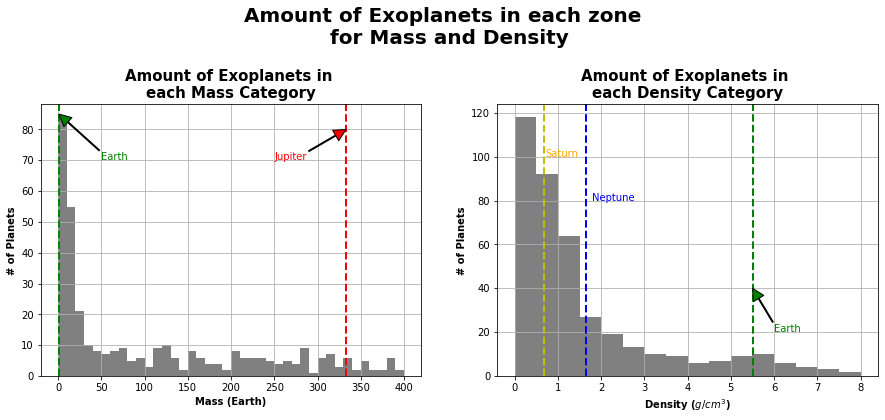

In [22]:
#Size
plt.figure(figsize=(15,5))

#Mass Histogram:
#Setting bins with loop
binsList = []
c = 0
for n in range(41):
    binsList.append(c)
    c += 10
#first hist
plt.subplot(121)
#Histogram creation with bins
plt.hist(massList,bins=binsList,facecolor='grey')
#Labels and limits
plt.title('Amount of Exoplanets in \neach Mass Category',fontweight='bold',fontsize=15)
plt.xlabel('Mass (Earth)',fontweight='bold')
plt.ylabel('# of Planets',fontweight='bold')
#Grid
plt.grid(True)
#Adding the vertical benchmarks for earth, jupiter
plt.axvline(x=1,color='g',linestyle='dashed',linewidth=2)
plt.axvline(x=333,color='r',linestyle='dashed',linewidth=2)
#Annotations for the benchmarks
plt.annotate('Earth',color='g',xy=(1,85),xytext=(50,70),arrowprops=dict(facecolor='green',width=1))
plt.annotate('Jupiter',color='red',xy=(333,80), xytext=(250,70),arrowprops=dict(facecolor='red',width=1))


#Density Histogram
#Setting the bins manually
binsList = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8]
#Second histogram
plt.subplot(122)
#Plotting histogram with bins
plt.hist(densityList,bins = binsList,facecolor='grey')
#Setting labels and limits
plt.title('Amount of Exoplanets in \neach Density Category',fontweight='bold',fontsize=15)
plt.xlabel('Density ($g/cm^3$)',fontweight='bold')
plt.ylabel('# of Planets',fontweight='bold')
#Grid
plt.grid(True)
#3 benchmark lines for neptune, saturn, earth
plt.axvline(x=5.51,color='g',linestyle='dashed',linewidth=2)
plt.axvline(x=0.69,color='y',linestyle='dashed',linewidth=2)
plt.axvline(x=1.64,color='b',linestyle='dashed',linewidth=2)
#Annotation for benchmarks
plt.annotate('Earth',color='green',xy=(5.5,40), xytext=(6,20),arrowprops=dict(facecolor='green',width=1))
plt.annotate('Saturn',color='orange',xy=(0.6,100),xytext=(0.7,100))
plt.annotate('Neptune',color='blue',xy=(1.64,100),xytext=(1.8,80))

#Overarching title
plt.suptitle('Amount of Exoplanets in each zone \n for Mass and Density',fontweight='bold',fontsize=20,y=1.15)
plt.show()